# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import time
import random

%matplotlib inline

## Input data

In [17]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


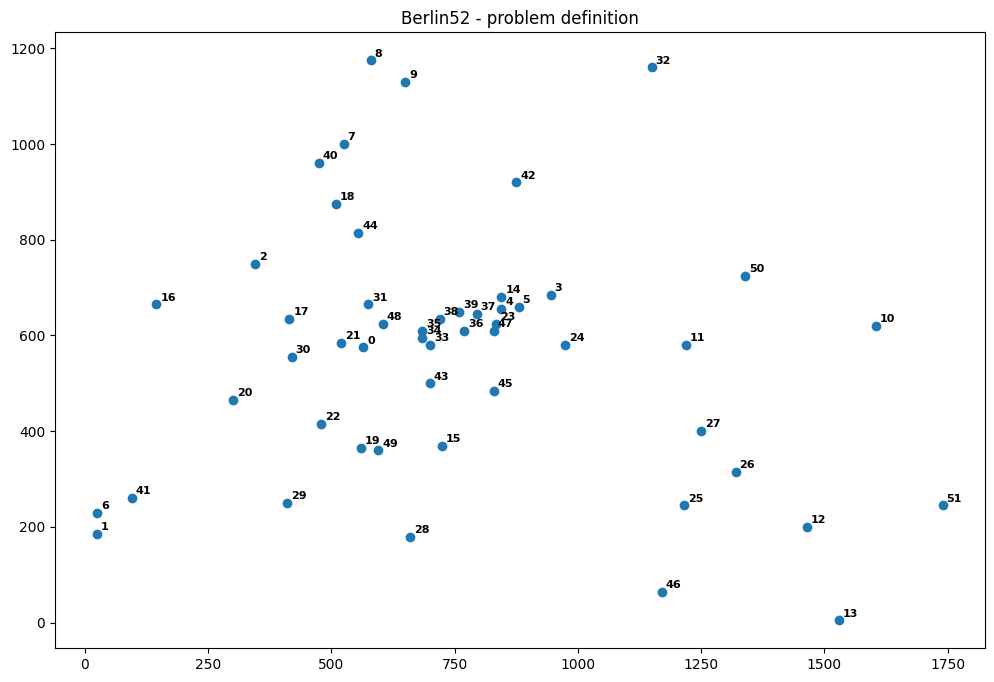

In [18]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 1200x800 with 0 Axes>

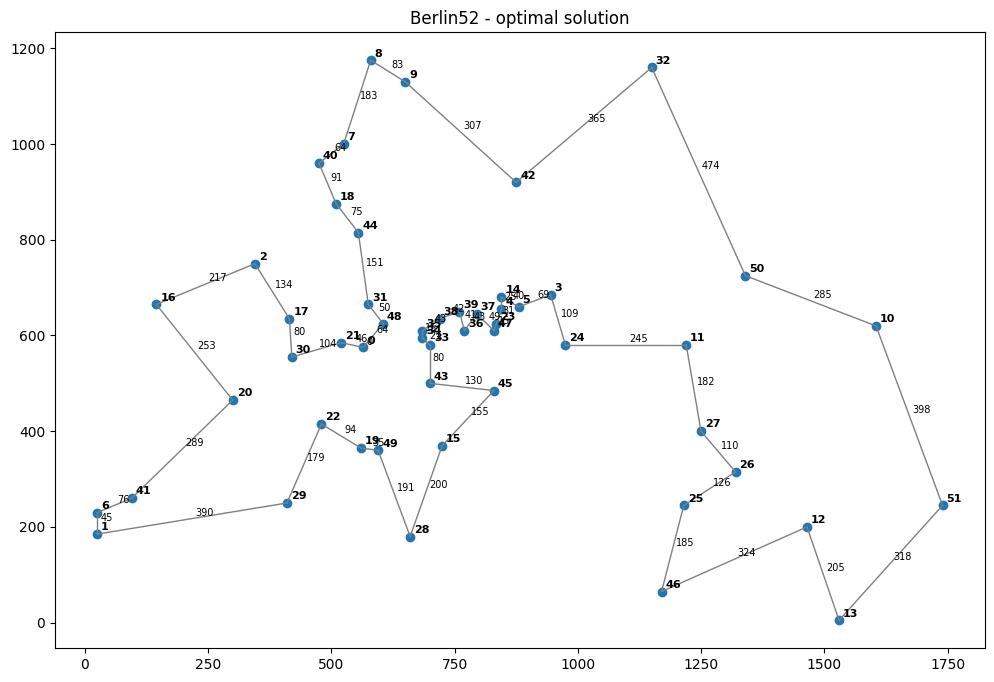

In [19]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [20]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [21]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [22]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
rs_costs = np.zeros(T)
scores = np.zeros(T)
min_value = np.Inf
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    scores[i] = tsp_objective_function(permutations[i, :])
    if scores[i] < min_value:
        min_value = scores[i]
    rs_costs[i] = min_value

print(time.time() - t0)

p = permutations[scores.argmin(), :]
print(tsp_objective_function(p), p)

14.480886459350586
22031.162124704882 [ 4  9  5 41 29 30 39 28 14 35 48 37 45  8 18 44 40 27 11  1 32 47 23 16
 20 31  2 34 49  0 33  3 10 51 50 26 38  7 21 15 36 25 46 12 13 24 42 43
 22 19  6 17]


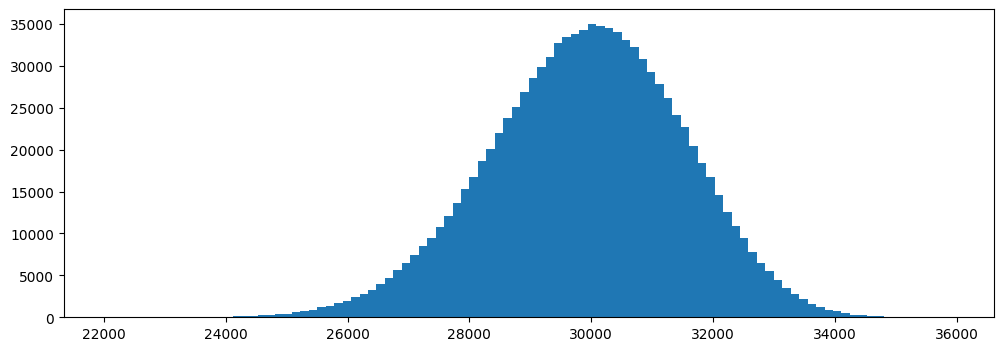

22067.428781174276 239.42658677027373


In [43]:
plt.figure(figsize=(12,4))
plt.hist(scores, bins=100)
plt.show()

print(rs_costs.mean(), rs_costs.std())

## Simulated Annealing

In [24]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [25]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
sa_costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    sa_costs[t] = p_cost

print(time.time() - t0, sa_costs.min())

12.057556629180908 9193.241997775873


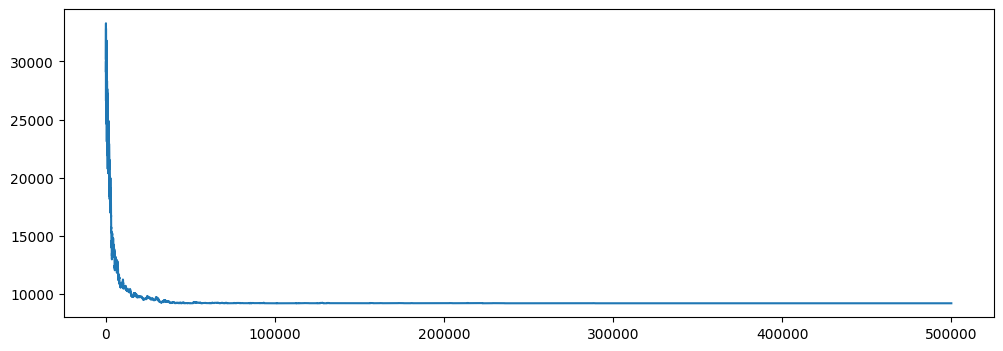

In [26]:
plt.figure(figsize=(12,4))
plt.plot(sa_costs)
plt.show()

## SGA-PMX

In [18]:
def PMX(parent1, parent2):
    size = len(parent1)
    
    point1, point2 = sorted(random.sample(range(size), 2))
    def PMX_one_offspring(p1, p2):
        offspring = np.zeros(len(p1), dtype=p1.dtype)

        # Copy the mapping section (middle) from parent1
        offspring[point1:point2] = p1[point1:point2]

        # copy the rest from parent2 (provided it's not already there
        for i in np.concatenate([np.arange(0,point1), np.arange(point2,len(p1))]):
            candidate = p2[i]
            while candidate in p1[point1:point2]: # allows for several successive mappings
                # print(f"Candidate {candidate} not valid in position {i}") # DEBUGONLY
                candidate = p2[np.where(p1 == candidate)[0][0]]
            offspring[i] = candidate
        return offspring

    offspring1 = PMX_one_offspring(parent1, parent2)
    offspring2 = PMX_one_offspring(parent2, parent1)
    return offspring1, offspring2

In [24]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [29]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 500

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))
sda_costs = np.zeros(number_of_iterations)
sda_triplets = []
# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        

    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics
    if best_objective_value < objective_values[0]:
        best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]

    # print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    sda_costs[t] = objective_values.min()
    sda_triplets.append((objective_values.min(), objective_values.max(), objective_values.mean()))
print(objective_values.min(), objective_values.max(), objective_values.mean())

7971.844169332931 7971.844169332931 7971.844169332932


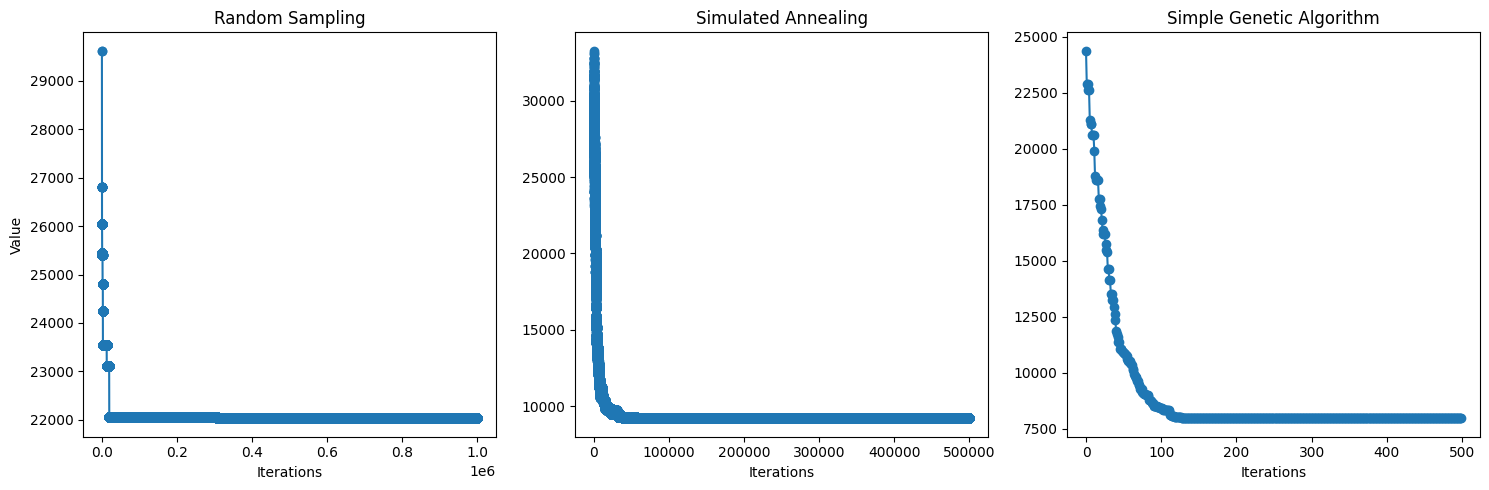

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(rs_costs, marker='o')
axs[0].set_title('Random Sampling')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Value')

axs[1].plot(sa_costs, marker='o')
axs[1].set_title('Simulated Annealing')
axs[1].set_xlabel('Iterations')

axs[2].plot(sda_costs, marker='o')
axs[2].set_title('Simple Genetic Algorithm')
axs[2].set_xlabel('Iterations')

plt.tight_layout()
plt.show()

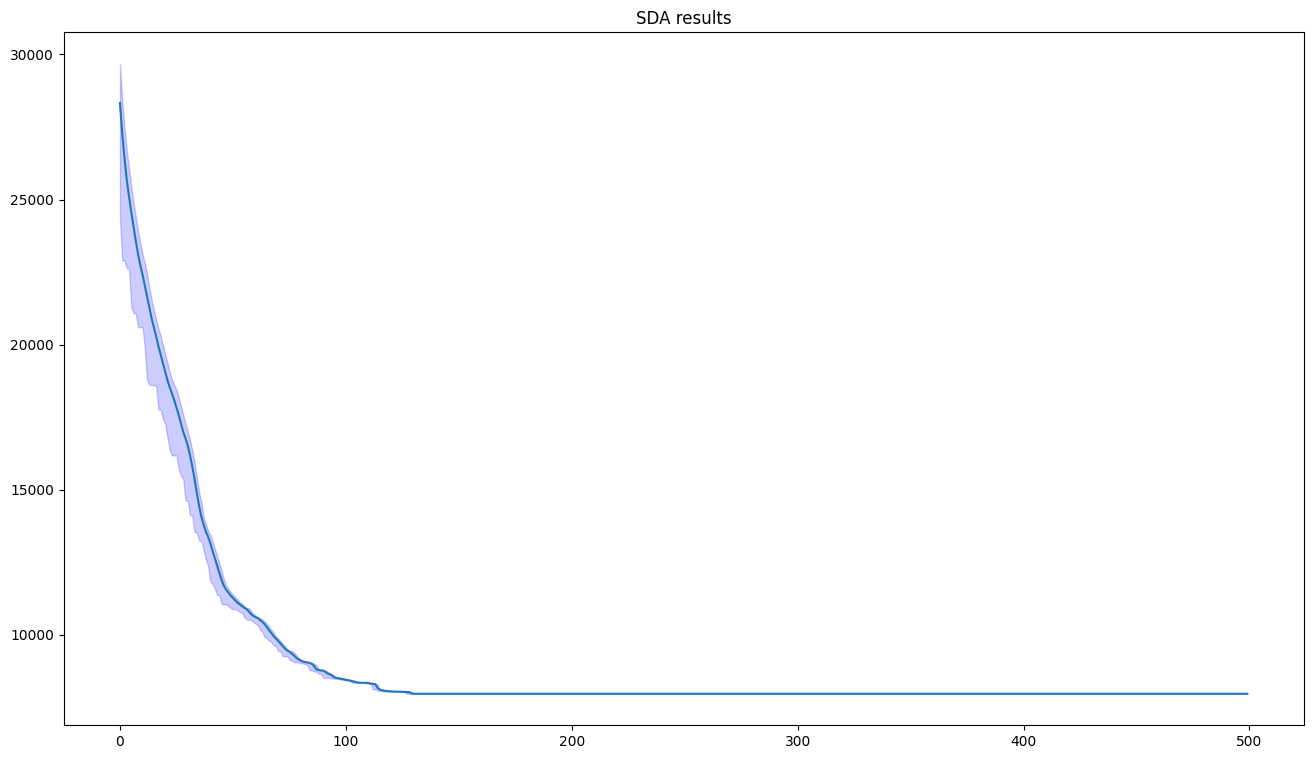

In [31]:
min_vals = [i[0] for i in sda_triplets]
max_vals = [i[1] for i in sda_triplets]
mean_vals = [i[2] for i in sda_triplets]
plt.figure(figsize=(16,9))
plt.plot(mean_vals)
plt.fill_between(range(len(min_vals)), min_vals, max_vals, color="blue", alpha=0.2)
plt.title('SDA results')
plt.show()

Zad1 d&e

In [32]:
def swap_mutation(p):
    a, b = np.random.choice(len(p), 2, replace=False)
    q = p.copy()
    q[a], q[b] = q[b], q[a]
    return q

In [90]:
def sda(
        mutation_func,
        n,
        crossover_func=PMX,
        obj_func=tsp_objective_function,
        number_of_iterations=500
    ):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    sda_costs = np.zeros(number_of_iterations)
    sda_triplets = []
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = obj_func(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0 and not any(np.isnan(fitness_values)) and not any(np.isinf(fitness_values)):
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover_func(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
            

        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_func(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = obj_func(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        # print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
        sda_costs[t] = objective_values.min()
        sda_triplets.append((objective_values.min(), objective_values.max(), objective_values.mean()))
    return sda_triplets

In [34]:
sda_reverse_sequence_triplets = sda(reverse_sequence_mutation, n)
sda_swap_triplets = sda(swap_mutation, n)

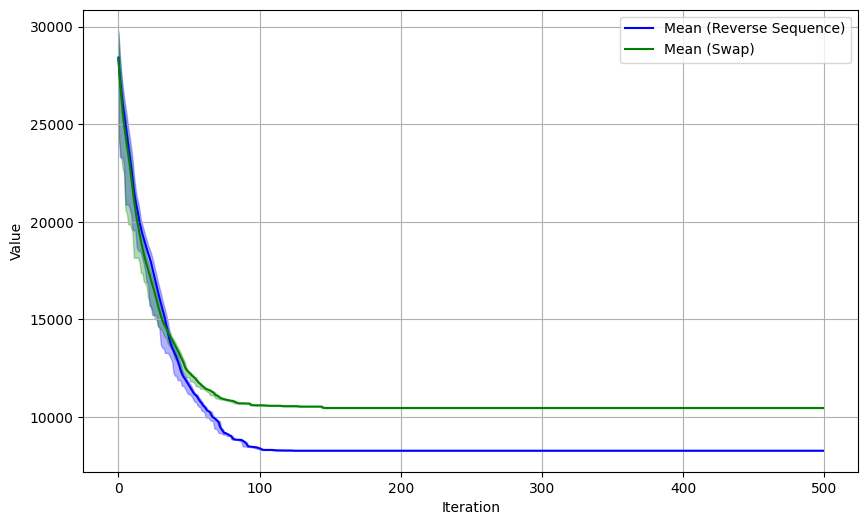

In [46]:
min1, max1, mean1 = zip(*sda_reverse_sequence_triplets)
min2, max2, mean2 = zip(*sda_swap_triplets)

# Numeracja iteracji
iterations = range(len(sda_swap_triplets))

# Tworzenie wykresu
plt.figure(figsize=(10, 6))

# Rysowanie przedziałów dla pierwszego zbioru
plt.fill_between(iterations, min1, max1, color='blue', alpha=0.3)
plt.plot(iterations, mean1, color='blue',label='Mean (Reverse Sequence)')

# Rysowanie przedziałów dla drugiego zbioru
plt.fill_between(iterations, min2, max2, color='green', alpha=0.3,)
plt.plot(iterations, mean2, color='green', label='Mean (Swap)')

# Dodawanie legendy i opisów
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('')
plt.grid()

# Wyświetlenie wykresu
plt.show()

In [36]:
def load_tsp_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    coords = []
    start = False
    for line in lines:
        if line.strip() == "DISPLAY_DATA_SECTION" or line.strip() == "NODE_COORD_SECTION":
            start = True
            continue
        if start:
            if line.strip() == "EOF":
                break
            parts = line.strip().split()
            coords.append((float(parts[1]), float(parts[2])))
    return np.array(coords)

def load_optimal_tour(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    tour = []
    start = False
    for line in lines:
        if line.strip() == "TOUR_SECTION":
            start = True
            continue
        if start:
            if line.strip() == "-1" or line.strip() == "EOF":
                break
            tour.append(int(line.strip()) - 1)  # -1 to use 0-based indexing
    return tour

In [37]:
def plot_triplets(triplets, problem, opt_value=0.0):
    min_vals = [i[0] for i in triplets]
    max_vals = [i[1] for i in triplets]
    mean_vals = [i[2] for i in triplets]
    plt.figure(figsize=(12,8))
    plt.plot(mean_vals)
    plt.fill_between(range(len(min_vals)), min_vals, max_vals, color="blue", alpha=0.2)
    plt.title(f'SDA results for {problem}, min_value = {min_vals[-1]}, opt_value={opt_value}')
    plt.axhline(y=opt_value, color='red', linestyle='--')
    plt.show()

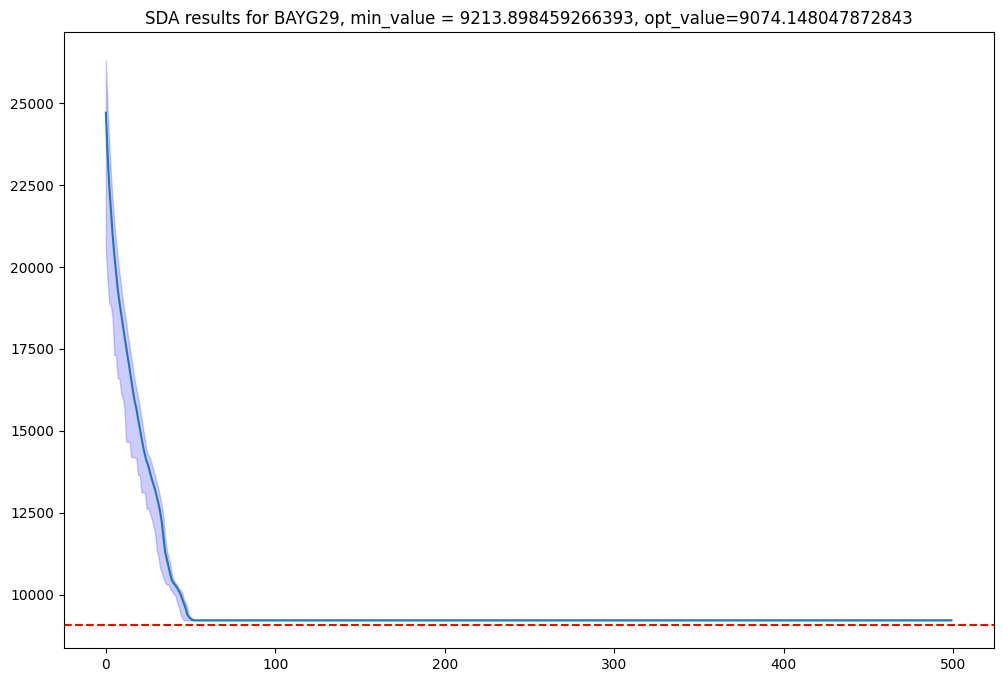

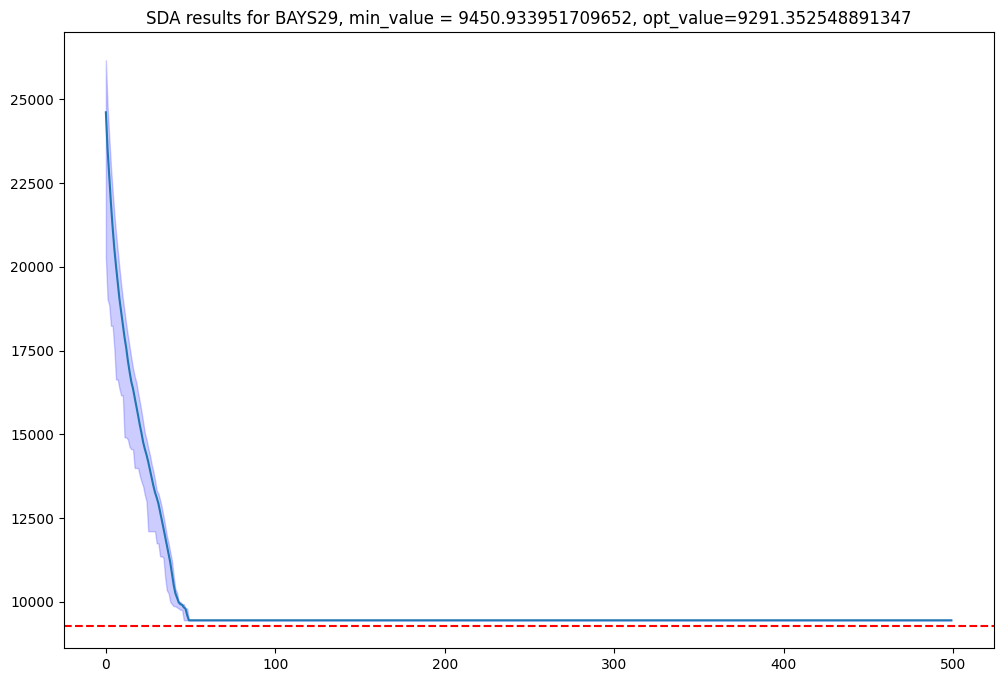

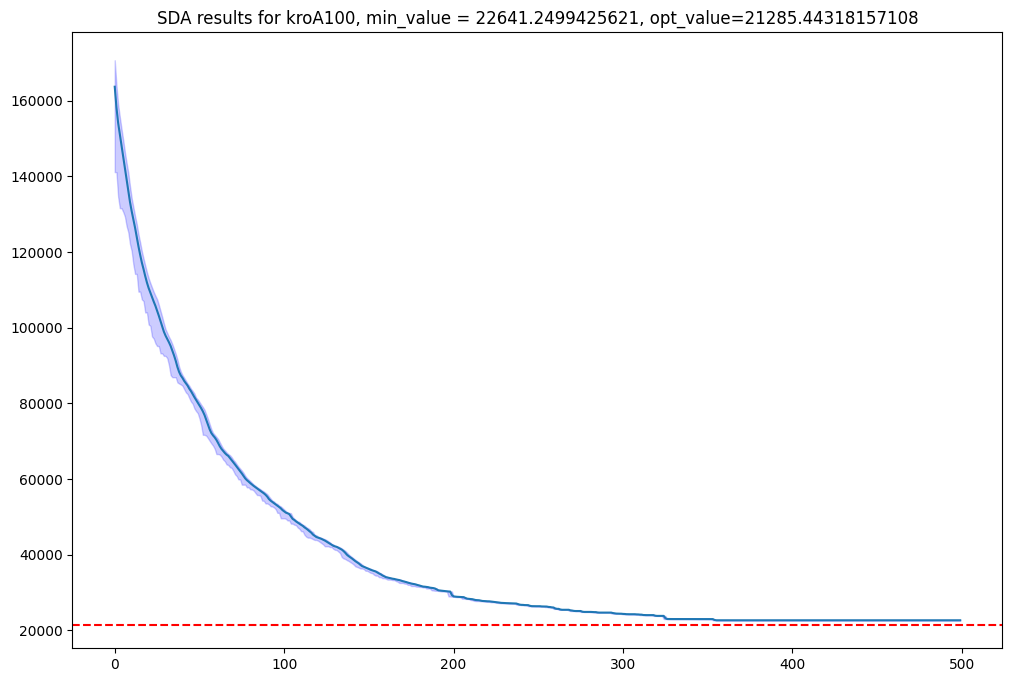

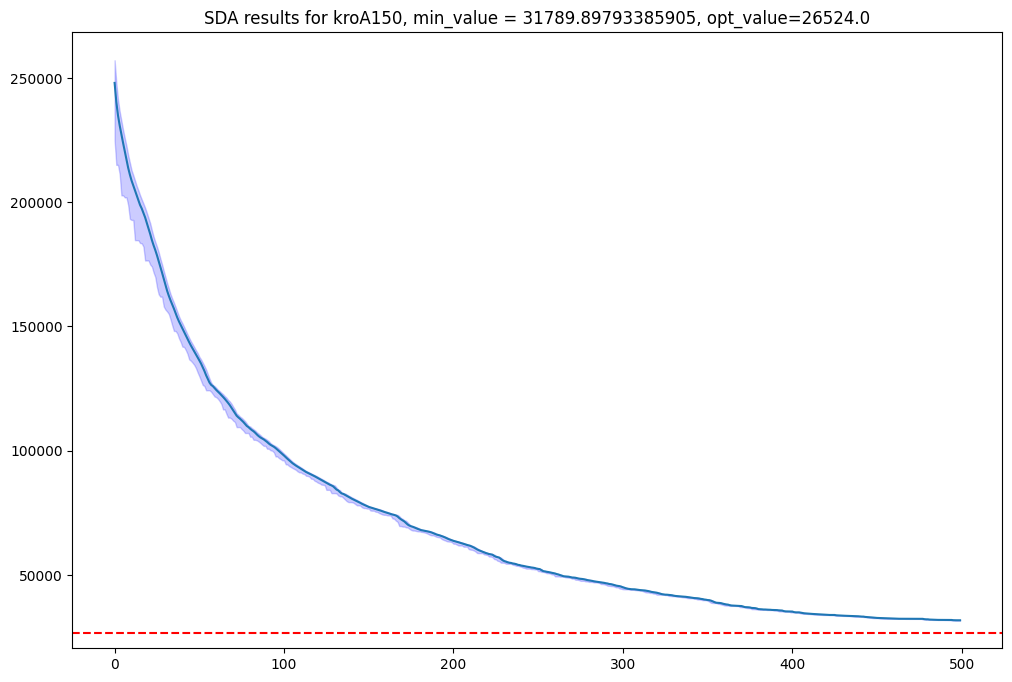

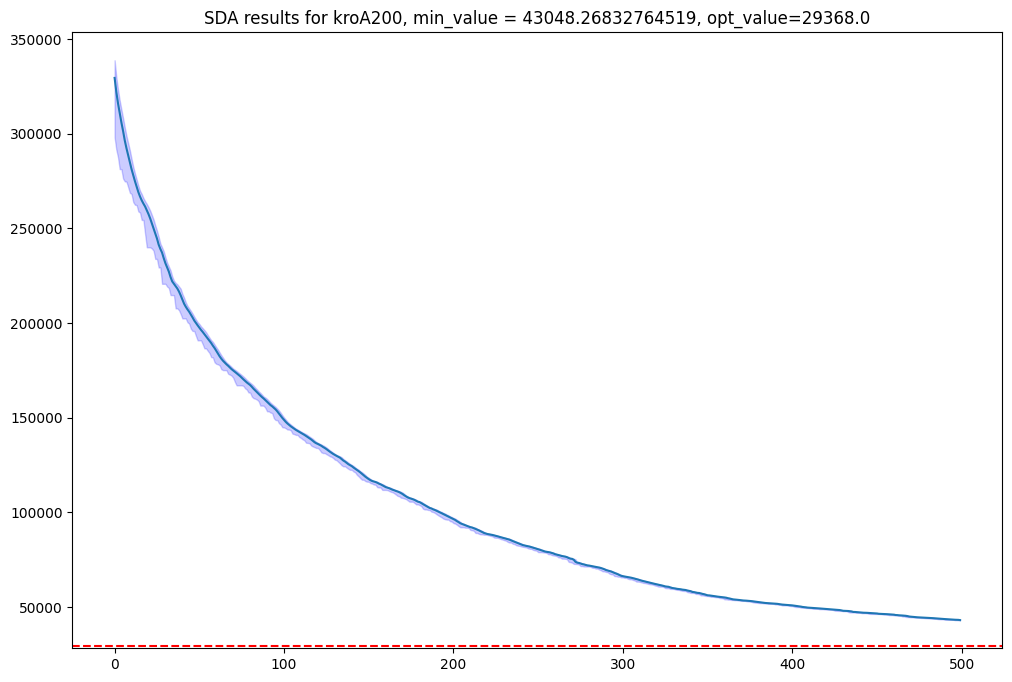

In [47]:
# bayg29
coords = load_tsp_data("zad1_dane/bayg29.tsp")
optimal_tour = load_optimal_tour("zad1_dane/bayg29.opt.tour")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())

plot_triplets(sda(reverse_sequence_mutation, n), "BAYG29", opt_value=tsp_objective_function(optimal_tour))
# bays29
coords = load_tsp_data("zad1_dane/bays29.tsp")
optimal_tour = load_optimal_tour("zad1_dane/bays29.opt.tour")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())

plot_triplets(sda(reverse_sequence_mutation, n), "BAYS29", opt_value=tsp_objective_function(optimal_tour))
# kroA100
coords = load_tsp_data("zad1_dane/kroA100.tsp")
optimal_tour = load_optimal_tour("zad1_dane/kroA100.opt.tour")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())

plot_triplets(sda(reverse_sequence_mutation, n), "kroA100", opt_value=tsp_objective_function(optimal_tour))
# kroA150
coords = load_tsp_data("zad1_dane/kroA150.tsp")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())

plot_triplets(sda(reverse_sequence_mutation, n), "kroA150", opt_value=26524.0) # found on the internet
# kroA200
coords = load_tsp_data("zad1_dane/kroA200.tsp")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())

plot_triplets(sda(reverse_sequence_mutation, n), "kroA200", opt_value=29368.0) # found on the internet


Zadanie 2


In [39]:
def OX(parent1, parent2):
    """
    Order Crossover - Cut part from p1, then copy elements from p2 in order
    """
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        point1, point2 = sorted(np.random.choice(range(size), 2, replace=False))
        child[point1:point2] = p1[point1:point2]
        fill_pos = point2
        for gene in p2:
            if gene not in child:
                if fill_pos >= size:
                    fill_pos = 0
                child[fill_pos] = gene
                fill_pos += 1
        return child
    return crossover(parent1, parent2), crossover(parent2, parent1)

def CX(parent1, parent2):
    """
    Cycle Crossover - Find cycles in p1 (p1 as base, p2 as mapping), copy it to child and then rest of the elements comes from p2 in order
    """
    parent1, parent2 = parent1.tolist(), parent2.tolist()
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        index = 0
        start = index
        while child[start] == -1:
            child[start] = p1[start]
            start = p2.index(p1[start])
        for i in range(size):
            if child[i] == -1:
                child[i] = p2[i]
        return np.array(child)
    return crossover(parent1, parent2), crossover(parent2, parent1)

def PBX(parent1, parent2):
    """
    Position-Based Crossover - Get random subset from p1, copy them in that order to child, rest of position are filled with elements from p2
    """
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        positions = np.random.choice(range(size), size // 2, replace=False)
        for pos in positions:
            child[pos] = p1[pos]
        current_pos = 0
        for gene in p2:
            if gene not in child:
                while child[current_pos] != -1:
                    current_pos += 1
                child[current_pos] = gene
        return child
    return crossover(parent1, parent2), crossover(parent2, parent1)

def OBX(parent1, parent2):
    """
    Order-Based Crossover - Choose random position from P1, put elements from P1 at these positions on positions these elements have in P2, fill rest with P2 elements
    """
    parent1, parent2 = parent1.tolist(), parent2.tolist()
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        positions = np.random.choice(range(size), size // 2, replace=False)
        p1_elems = [p1[pos] for pos in positions]
        p2_pos = [p2.index(elem) for elem in p1_elems]
        p2_pos.sort()
        for pos, elem in zip(p2_pos, p1_elems):
            child[pos] = elem
        idx = 0
        for gene in p2:
            if gene not in child:
                while child[idx] != -1:
                    idx += 1
                child[idx] = gene
        return np.array(child)
    return crossover(parent1, parent2), crossover(parent2, parent1)

def PPX(parent1, parent2):
    """
    Precedence Preservative Crossover - Pick gene from each parent with 0.5 ppb. place it at index from p1 if its not already in child, then fill empties with genes from p2
    """
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        available = {gene: i for i, gene in enumerate(p1)}
        for i in range(size):
            if np.random.rand() < 0.5:
                gene = p1[i]
            else:
                gene = p2[i]
            if child[available[gene]] == -1:
                child[available[gene]] = gene
        for i in range(size):
            if child[i] == -1:
                for gene in p2:
                    if gene not in child:
                        child[i] = gene
                        break
        return child
    return crossover(parent1, parent2), crossover(parent2, parent1)

def LCSX(parent1, parent2):
    """
    Linear Crossover Sequence - Pick random index, get elements from 0 to this index from p1, add rest of elements from p2
    """
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        point = np.random.randint(1, size)
        child[:point] = p1[:point]
        child[point:] = [gene for gene in p2 if gene not in child[:point]]
        return child
    return crossover(parent1, parent2), crossover(parent2, parent1)

def LOX(parent1, parent2):
    """
    Linear Crossover Sequence - Pick random segment from p1, 
    """
    def crossover(p1, p2):
        size = len(p1)
        child = [-1] * size
        point1, point2 = sorted(np.random.choice(range(size), 2, replace=False))
        child[point1:point2] = p1[point1:point2]
        index = point2
        for gene in p2:
            if gene not in child:
                if index >= size:
                    index = 0
                child[index] = gene
                index += 1
        return child
    return crossover(parent1, parent2), crossover(parent2, parent1)


Done PMX
Done OX
Done CX
Done PBX
Done OBX
Done PPX
Done LCSX
Done LOX


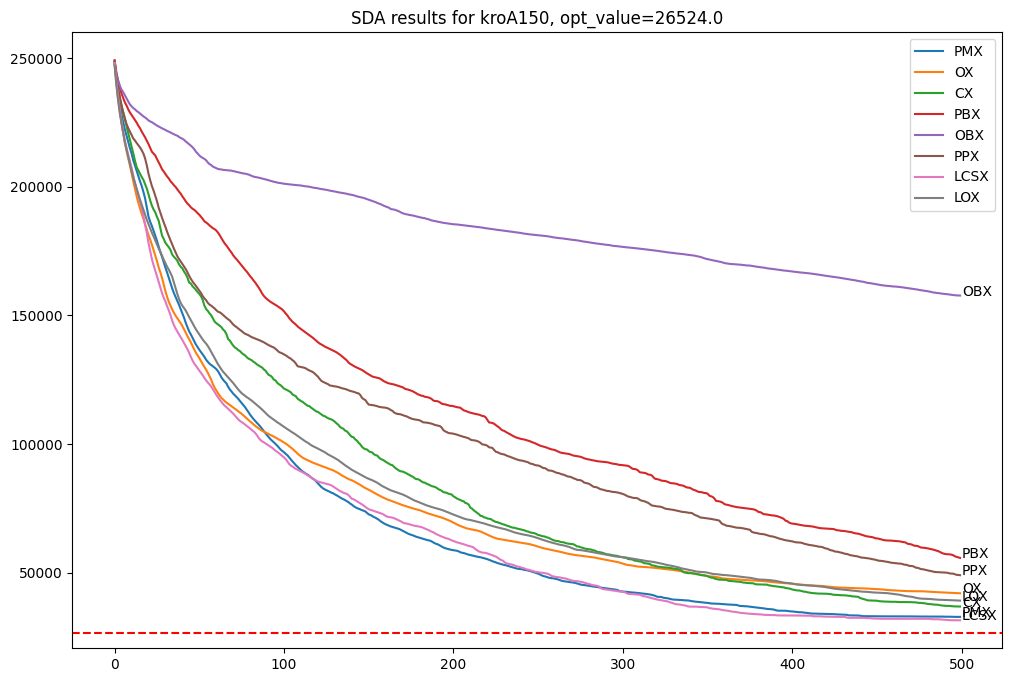

In [40]:
coords = load_tsp_data("zad1_dane/kroA150.tsp")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())
triplets = []
plt.figure(figsize=(12,8))
for operator in (
        PMX, OX, CX, PBX, OBX, PPX, LCSX, LOX
    ):
    triplets = sda(reverse_sequence_mutation, n, crossover_func=operator)
    mean_vals = [i[2] for i in triplets]
    plt.plot(mean_vals, label=operator.__name__)
    plt.annotate(operator.__name__, (len(mean_vals), mean_vals[-1]))
    print(f'Done {operator.__name__}')
plt.title(f'SDA results for kroA150, opt_value=26524.0')
plt.axhline(y=26524.0, color='red', linestyle='--')
plt.legend()
plt.show()

PMX i LCSX najlepiej działają, dość podobnie. Trzeci jest CX, potem OX, LOX, dalej PPX, PBX. OBX kompletna klapa.

Zadanie3

In [28]:
def local_search(chromosome, tsp_objective_function, K=5):
    """
    Local search: przeszukiwanie sąsiedztwa w permutacji. Zmieniamy nie więcej niż K pozycji.
    """
    best_chromosome = chromosome.copy()
    best_value = tsp_objective_function(best_chromosome)
    size = len(chromosome)
    # Przeszukujemy sąsiedztwa zmieniając do K elementów
    for k in range(K):
        points = np.random.choice(range(size), k, replace=False)
        new_chromosome = best_chromosome.copy()
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                idx1, idx2 = points[i], points[j]
                new_chromosome[idx1], new_chromosome[idx2] = new_chromosome[idx2], new_chromosome[idx1]
        new_value = tsp_objective_function(new_chromosome)
        if new_value < best_value:
            best_chromosome = new_chromosome
            best_value = new_value
                    
    return best_chromosome

def iterative_local_search(chromosome, tsp_objective_function, K=5, max_iterations=10):
    best_chromosome = chromosome.copy()
    best_value = tsp_objective_function(best_chromosome)
    size = len(chromosome)
    improved = True
    iteration = 0
    while improved and iteration < max_iterations:
        improved = False
        for k in range(K):
            points = np.random.choice(range(size), k, replace=False)
            new_chromosome = best_chromosome.copy()
            for i in range(len(points)):
                for j in range(i + 1, len(points)):
                    idx1, idx2 = points[i], points[j]
                    new_chromosome[idx1], new_chromosome[idx2] = new_chromosome[idx2], new_chromosome[idx1]
            new_value = tsp_objective_function(new_chromosome)
            if new_value < best_value:
                best_chromosome = new_chromosome
                best_value = new_value
                improved = True
        iteration += 1
    return best_chromosome

def local_search_sda(
        mutation_func,
        n,
        crossover_func=PMX,
        local_search_func=local_search,
        obj_func=tsp_objective_function,
        number_of_iterations=500
    ):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    sda_costs = np.zeros(number_of_iterations)
    sda_triplets = []
    
    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = obj_func(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover_func(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()

        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_func(children_population[i, :])
            
            # Apply local search after mutation
            children_population[i, :] = local_search_func(children_population[i, :], obj_func)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = obj_func(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        sda_costs[t] = objective_values.min()
        sda_triplets.append((objective_values.min(), objective_values.max(), objective_values.mean()))

    return sda_triplets


Best value for Base: 23019.261003761847
Best value for Local Search: 22301.73525559027
Best value for Iterated Local Search: 23933.91274424227


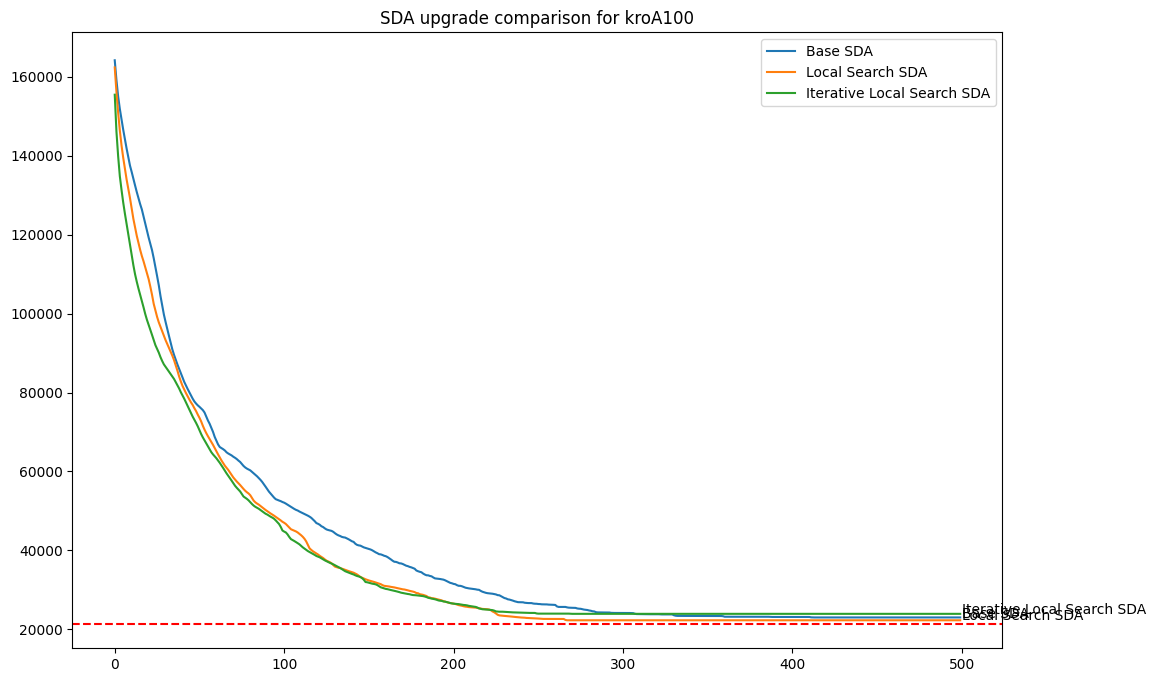

In [50]:
coords = load_tsp_data("zad1_dane/kroA100.tsp")
optimal_tour = load_optimal_tour("zad1_dane/kroA100.opt.tour")

n = len(coords)
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :]) ** 2).sum())
triplets = []
plt.figure(figsize=(12,8))

triplets = sda(reverse_sequence_mutation, n)
mean_vals = [i[2] for i in triplets]
plt.plot(mean_vals, label='Base SDA')
plt.annotate('Base SDA', (len(mean_vals), mean_vals[-1]))
print(f'Best value for Base: {mean_vals[-1]}')

triplets = local_search_sda(reverse_sequence_mutation, n)
mean_vals = [i[2] for i in triplets]
plt.plot(mean_vals, label='Local Search SDA')
plt.annotate('Local Search SDA', (len(mean_vals), mean_vals[-1]))
print(f'Best value for Local Search: {mean_vals[-1]}')

triplets = local_search_sda(reverse_sequence_mutation, n, local_search_func=iterative_local_search)
mean_vals = [i[2] for i in triplets]
plt.plot(mean_vals, label='Iterative Local Search SDA')
plt.annotate('Iterative Local Search SDA', (len(mean_vals), mean_vals[-1]))
print(f'Best value for Iterated Local Search: {mean_vals[-1]}')

plt.title(f'SDA upgrade comparison for kroA100')
plt.axhline(y=tsp_objective_function(optimal_tour), color='red', linestyle='--')
plt.legend()
plt.show()


In [1]:
import urllib

In [2]:
def qap_objective_function(p, A, B):
    n = len(p)
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

In [116]:
def get_qap(name):
    QAP_INSTANCE_URL = f'https://qaplib.mgi.polymtl.ca/data.d/{name}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    if name.startswith('nug'):
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        A[i, :] = list(map(int, line.decode()[:-1].split()))
  

    B = np.empty((n, n))
    if name != "tai50a":
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        B[i, :] = list(map(int, line.decode()[:-1].split()))

    QAP_OPT_URL = f'https://qaplib.mgi.polymtl.ca/soln.d/{name}.sln'
    sln_file = urllib.request.urlopen(QAP_OPT_URL)
    line = sln_file.readline()
    value = int(line.decode().split()[1])
    return (n, A, B), value

In [119]:
QAPs = []
opts = {

}

for i in range(12, 31):
    try:
        x, opt = get_qap(f'nug{i}')
        QAPs.append((f'Nug{i}', x))
        opts[f'Nug{i}'] = opt
    except:
        print(f'Nug{i} not found')

tais = [
    "tai50a", 
    "tai60a", 
    "tai80a"
    ]
for tai in tais:
    try:
        x, opt = get_qap(tai)
        QAPs.append((tai, x))
        opts[tai] = opt
    except:
        print(f'{tai} not found')

Nug13 not found
Nug16 not found
Nug19 not found
Nug23 not found
Nug26 not found
Nug29 not found
Nug30 not found


In [13]:
print(opts)

{'Nug12': '578', 'Nug14': '1014', 'Nug15': '1150', 'Nug17': '1732', 'Nug18': '1930', 'Nug20': '2570', 'Nug21': '2438', 'Nug22': '3596', 'Nug24': '3488', 'Nug25': '3744', 'Nug27': '5234', 'Nug28': '5166', 'tai50a': '4938796', 'tai60a': '7205962', 'tai80a': '13499184'}


In [79]:
def plot_qap_triplets(triplets, title, opt_value=0.0):
    min_vals = [i[0] for i in triplets]
    max_vals = [i[1] for i in triplets]
    mean_vals = [i[2] for i in triplets]
    plt.figure(figsize=(12,8))
    plt.plot(mean_vals)
    plt.title(f'{title}, min_value = {mean_vals[-1]}, opt_value={opt_value}')
    plt.fill_between(range(len(min_vals)), min_vals, max_vals, color="blue", alpha=0.2)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

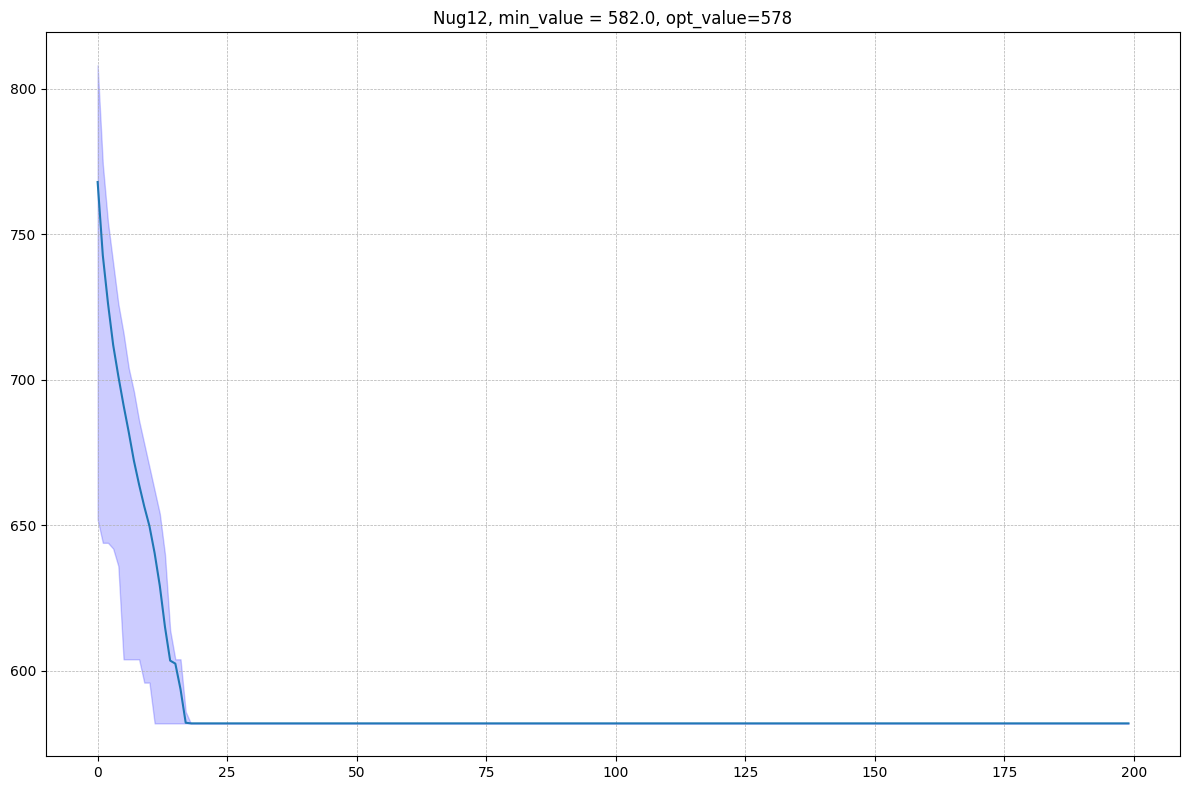

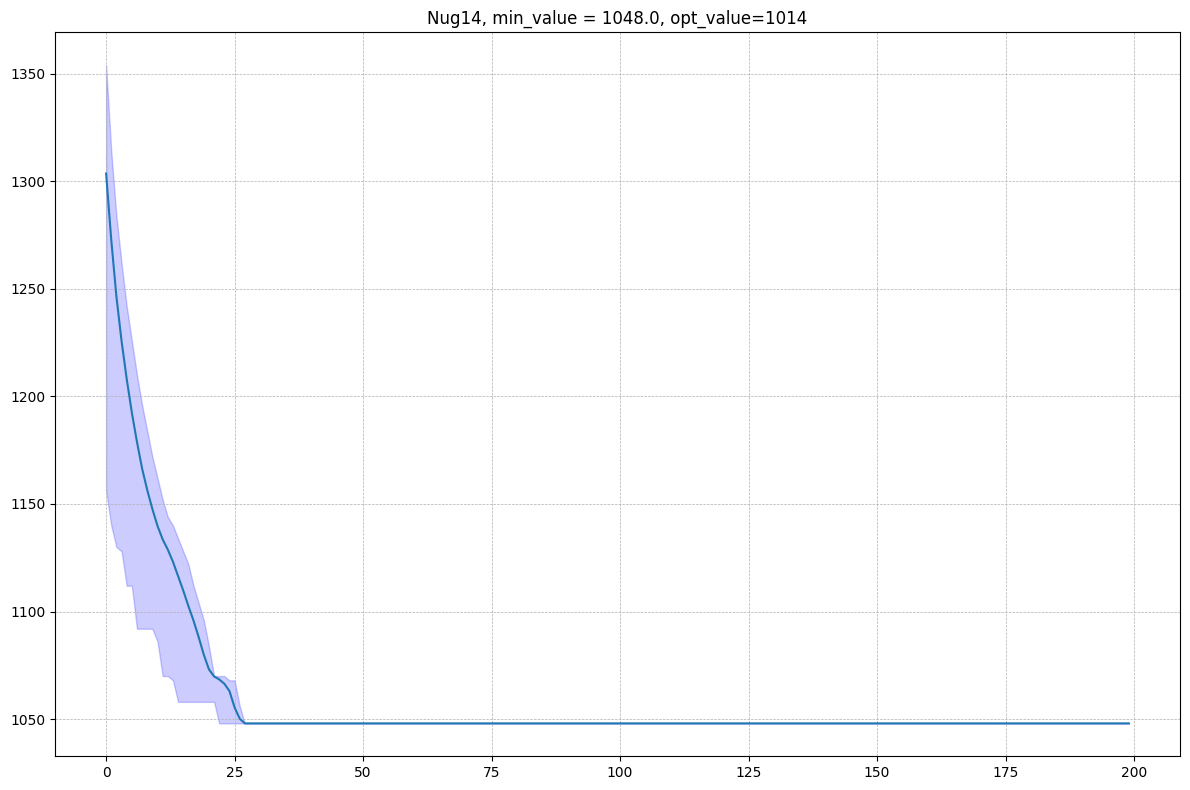

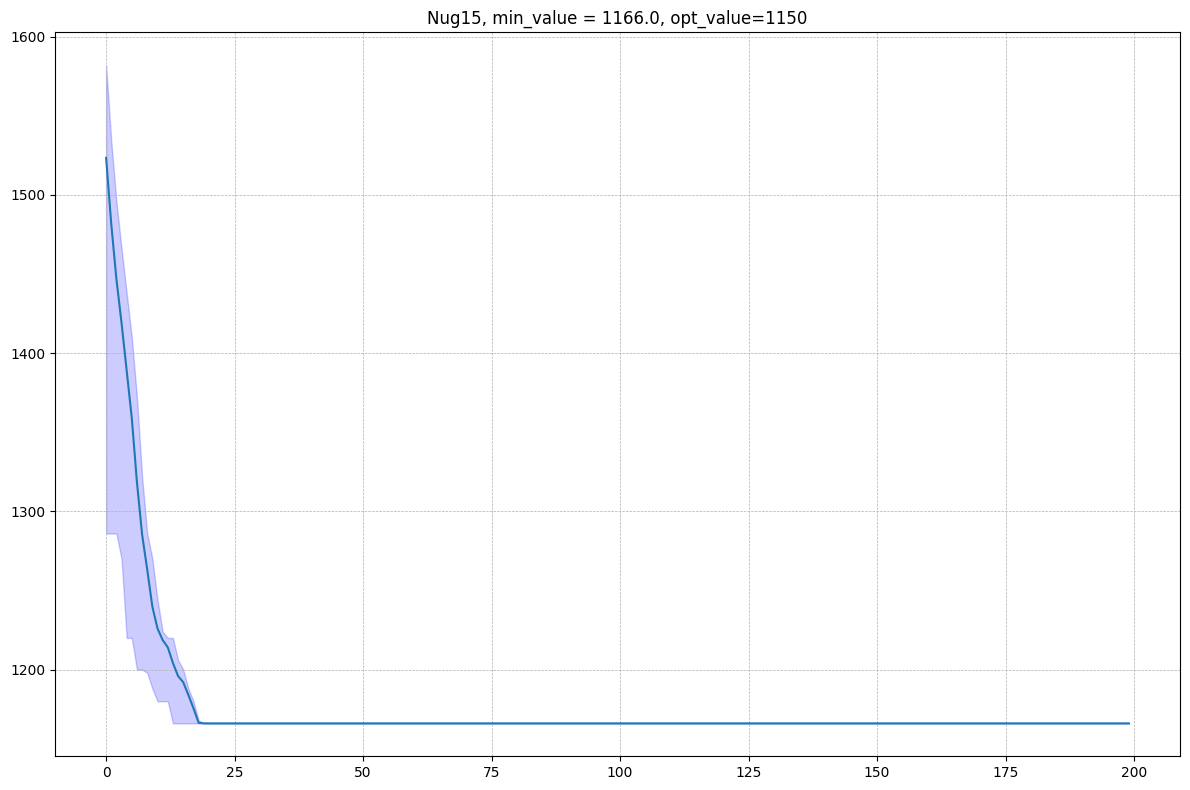

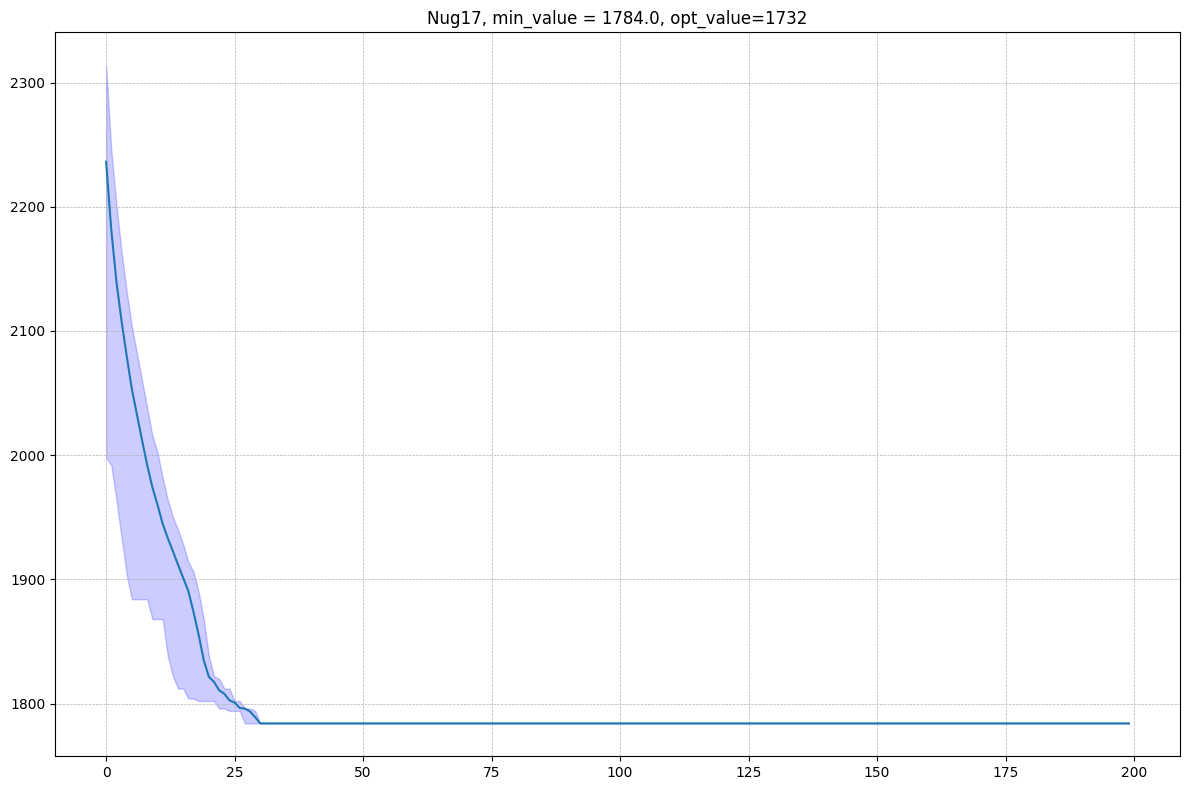

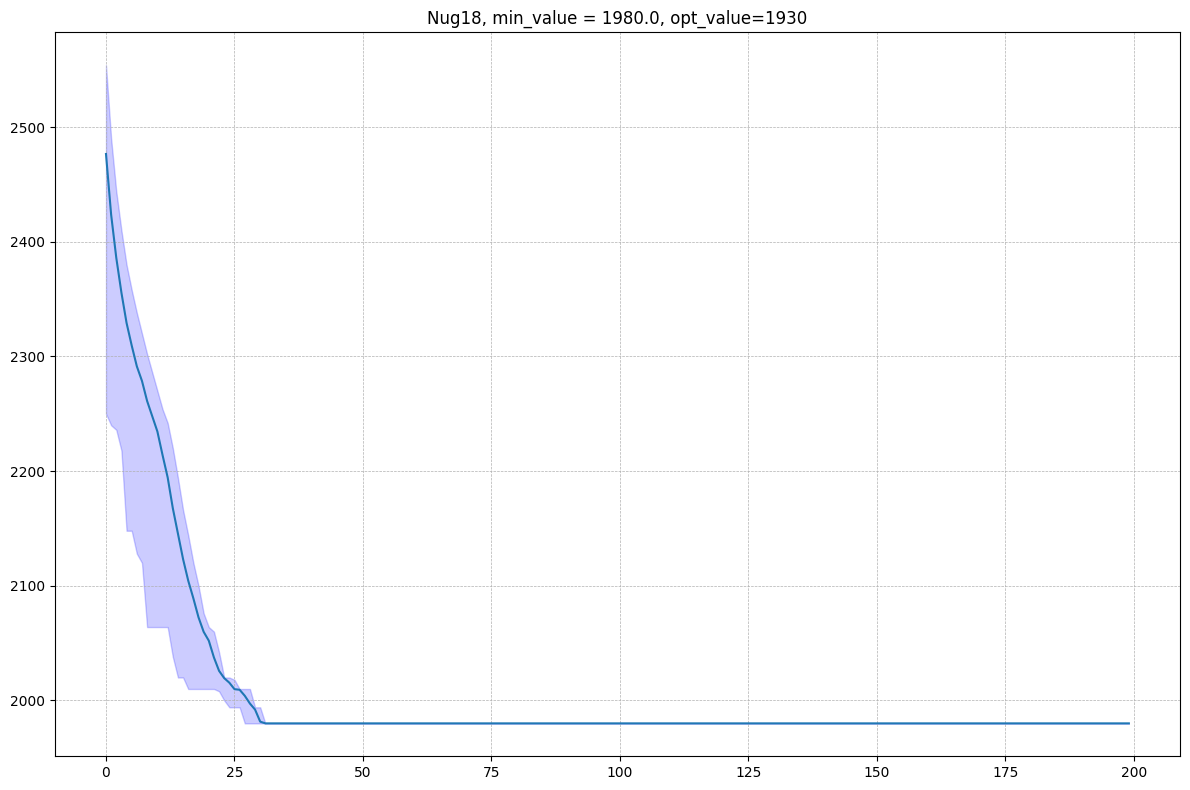

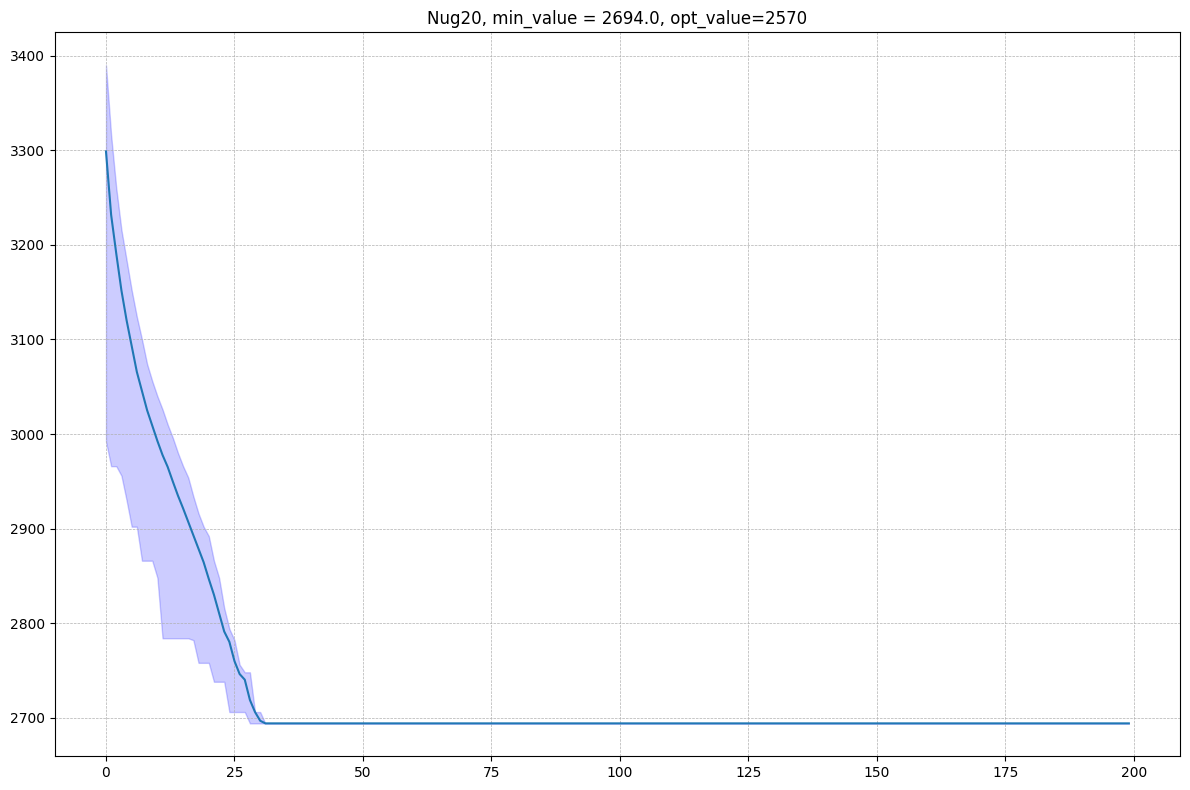

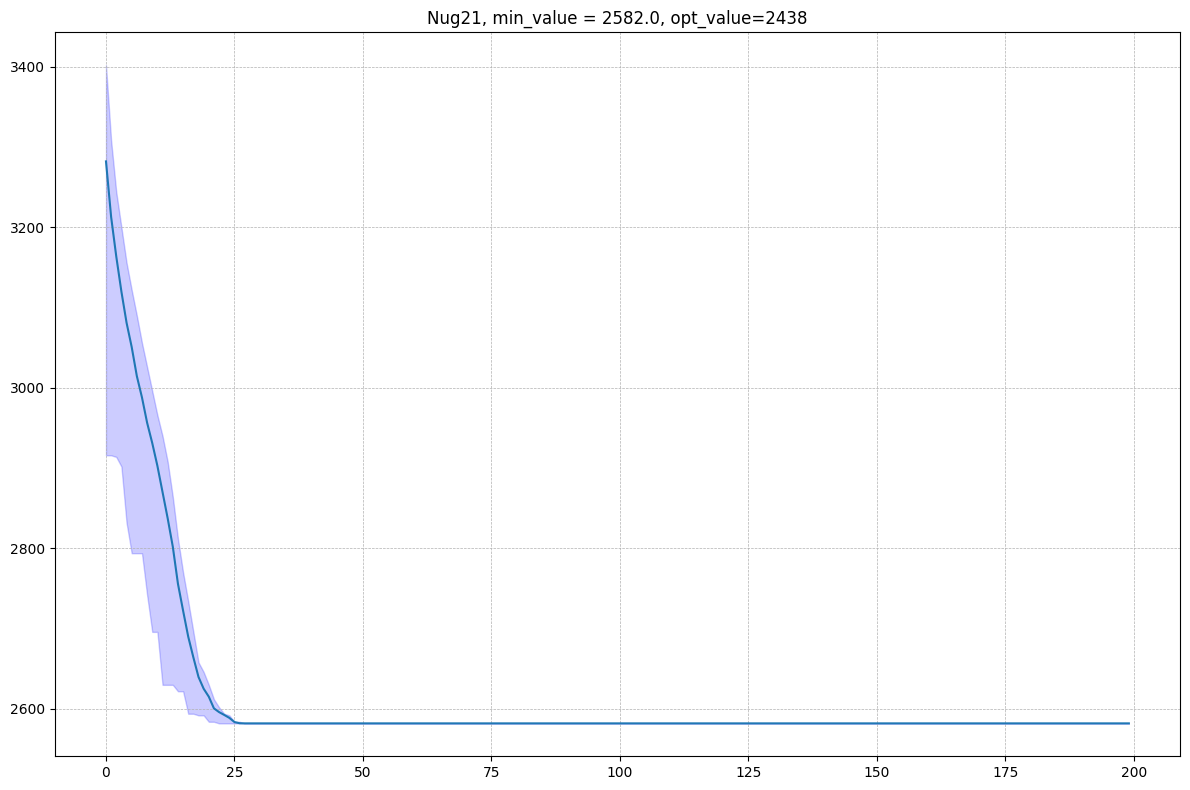

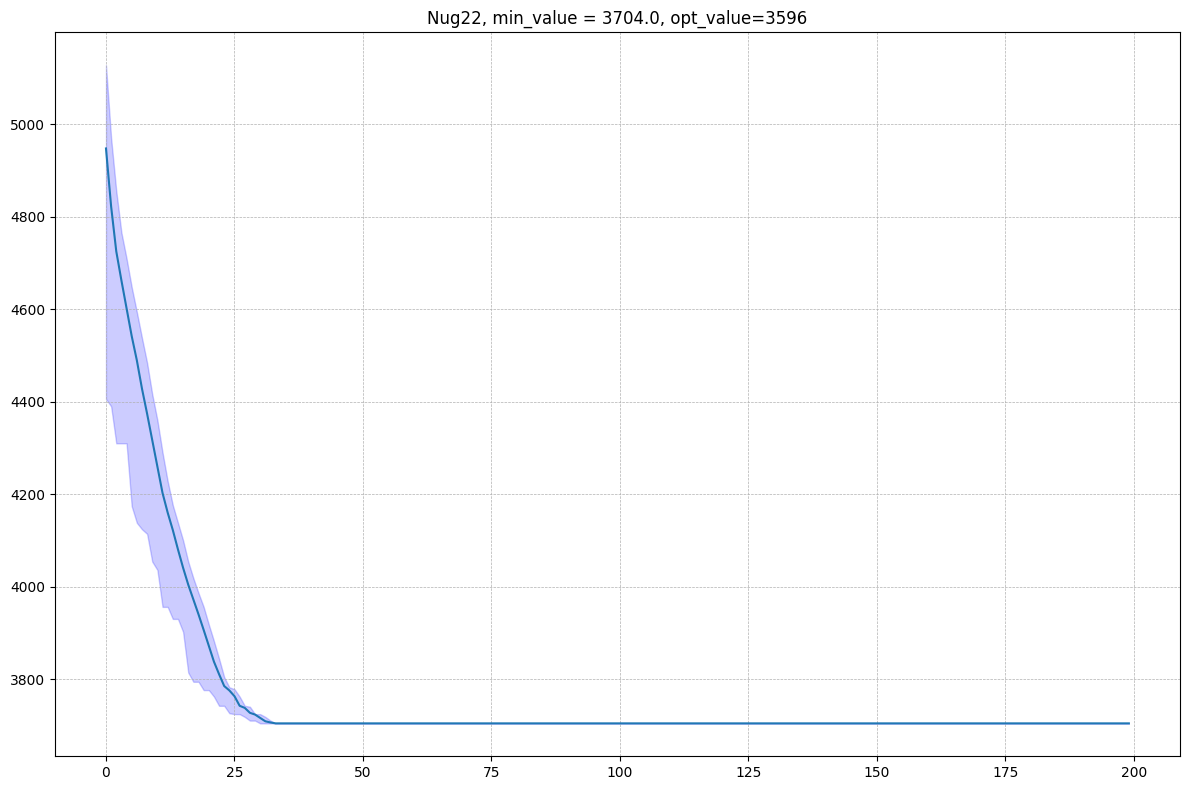

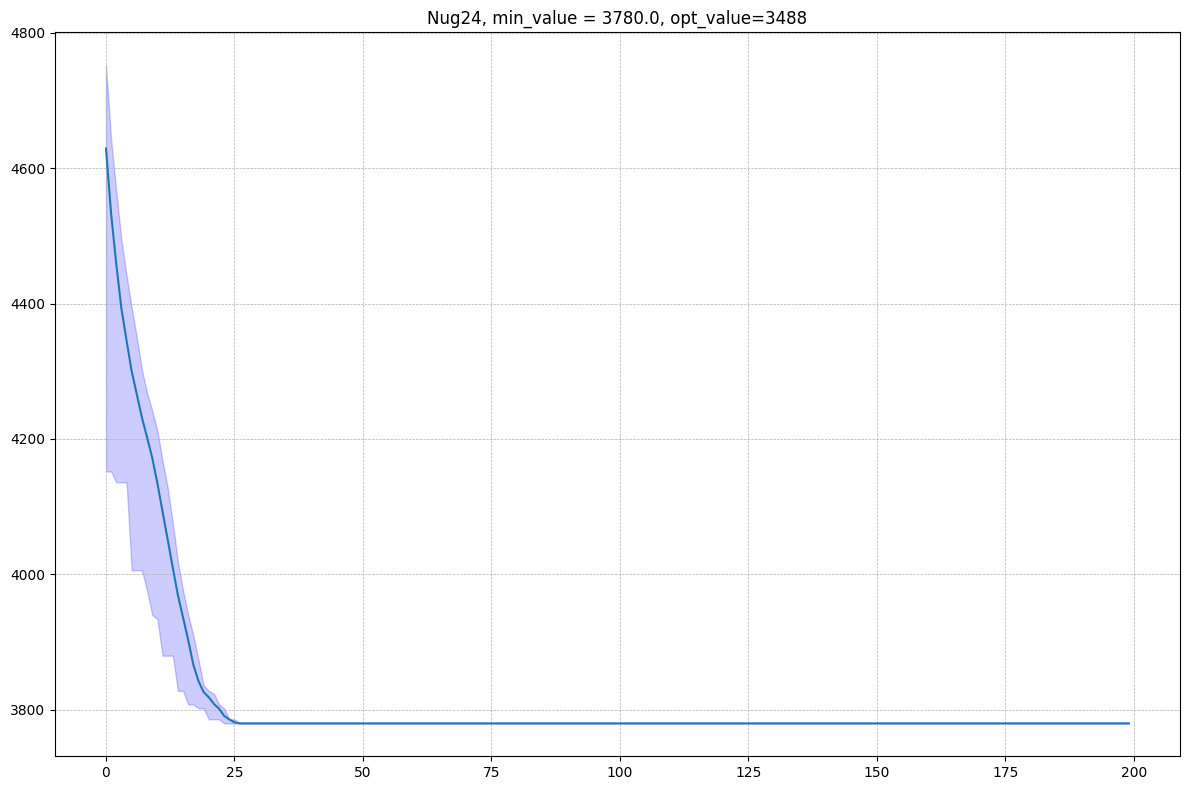

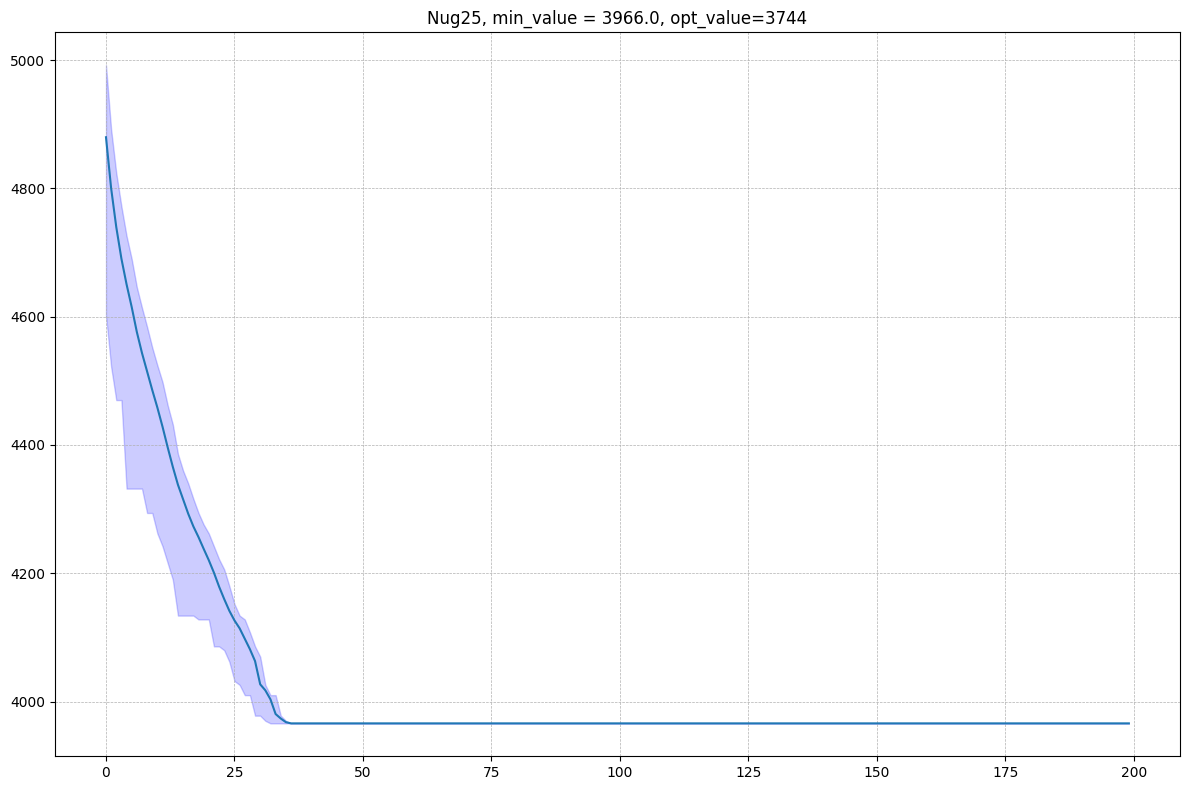

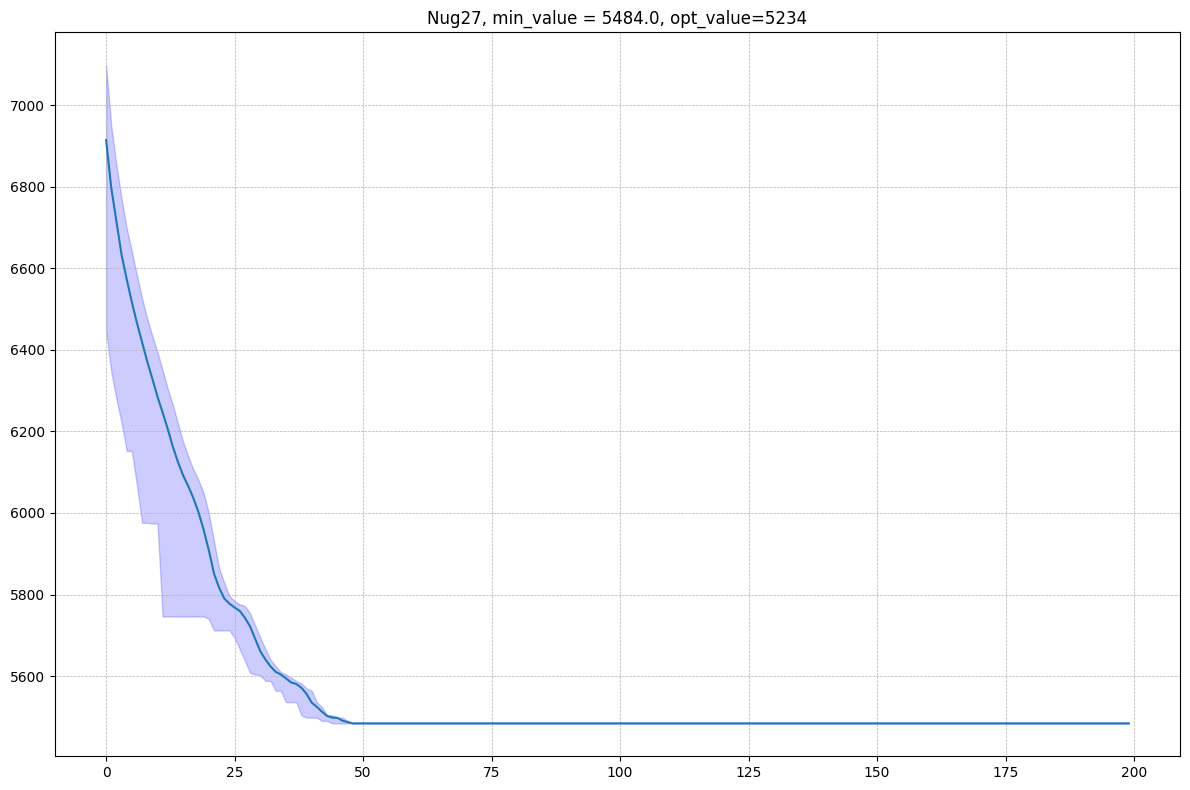

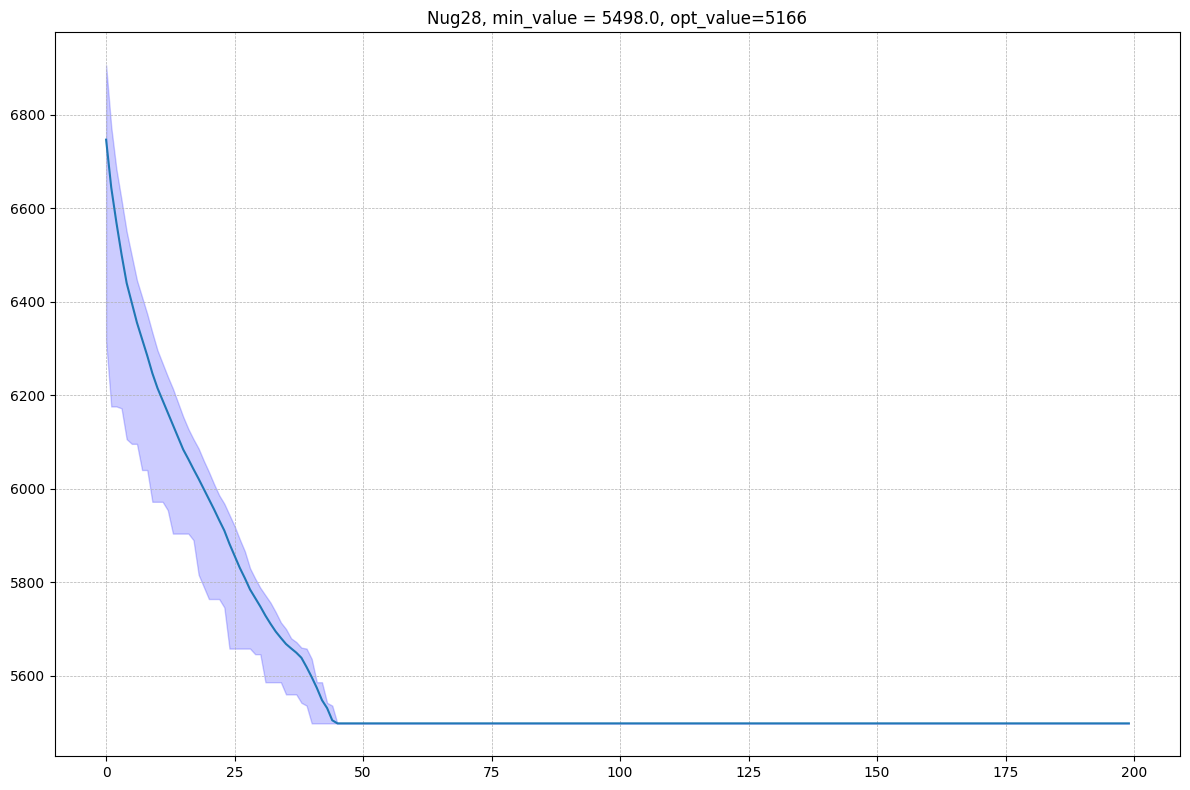

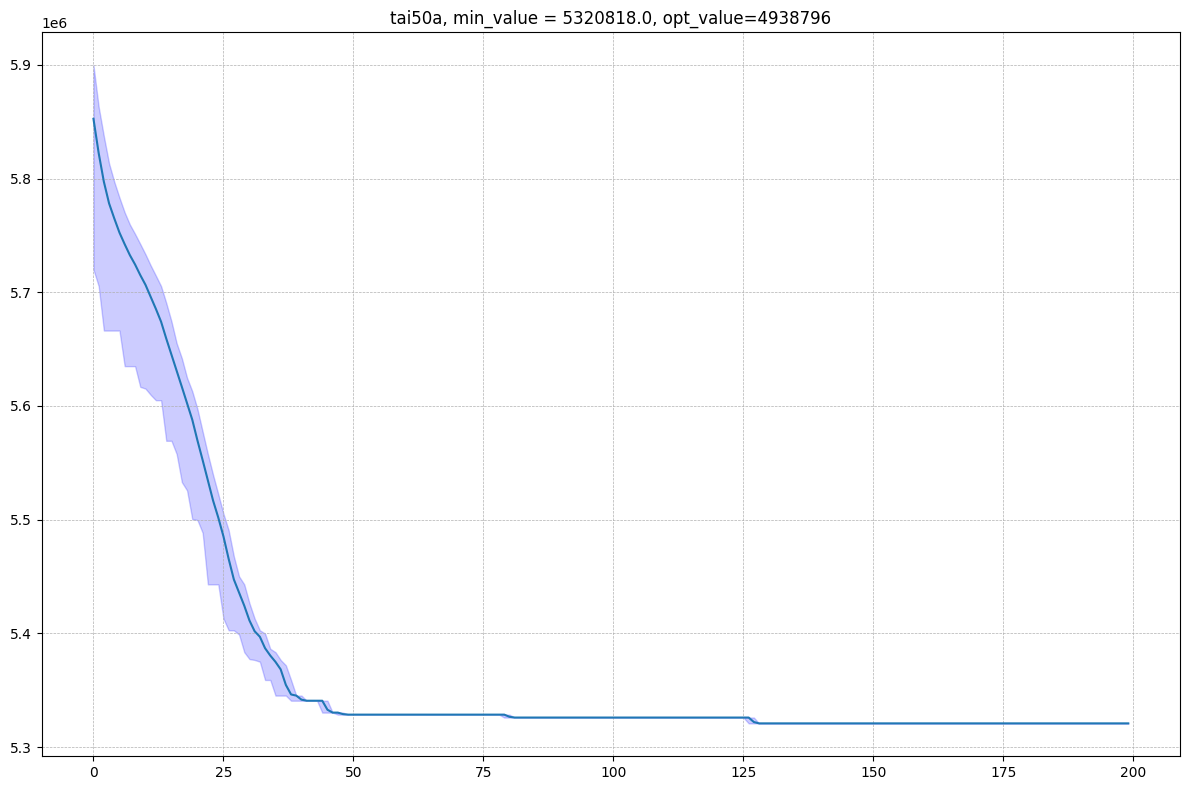

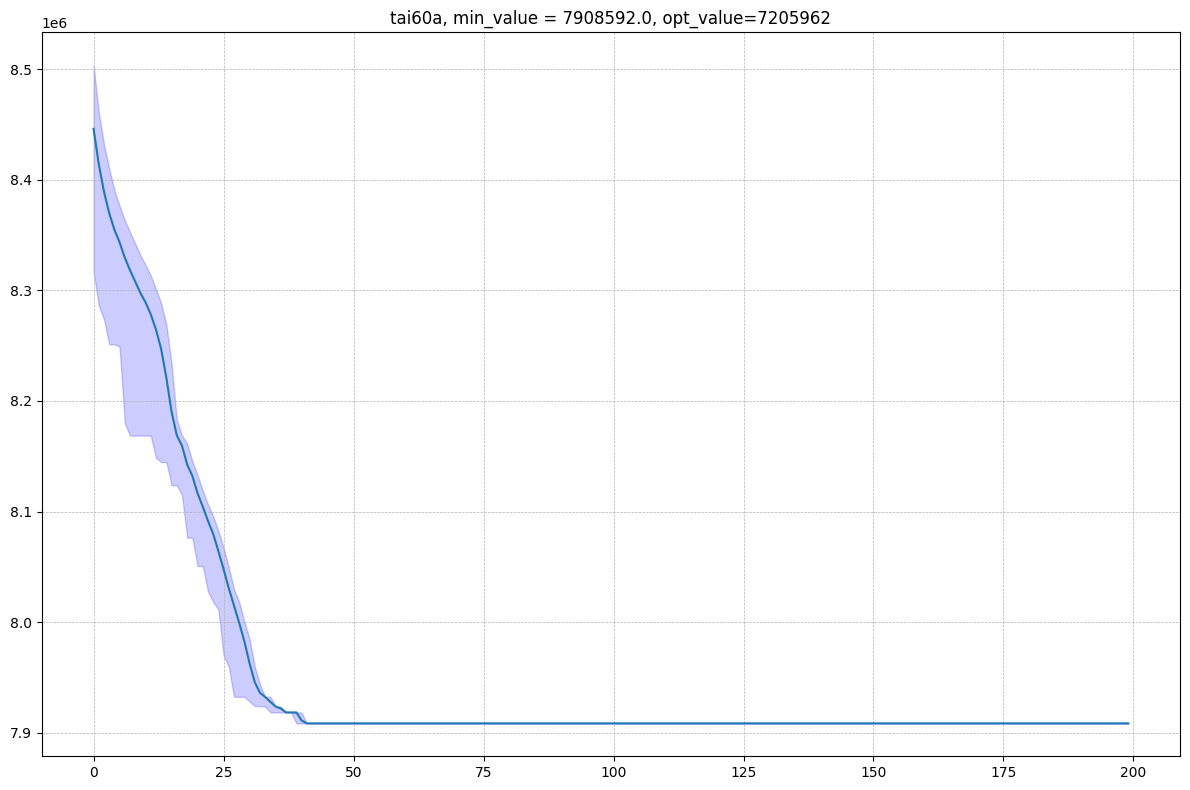

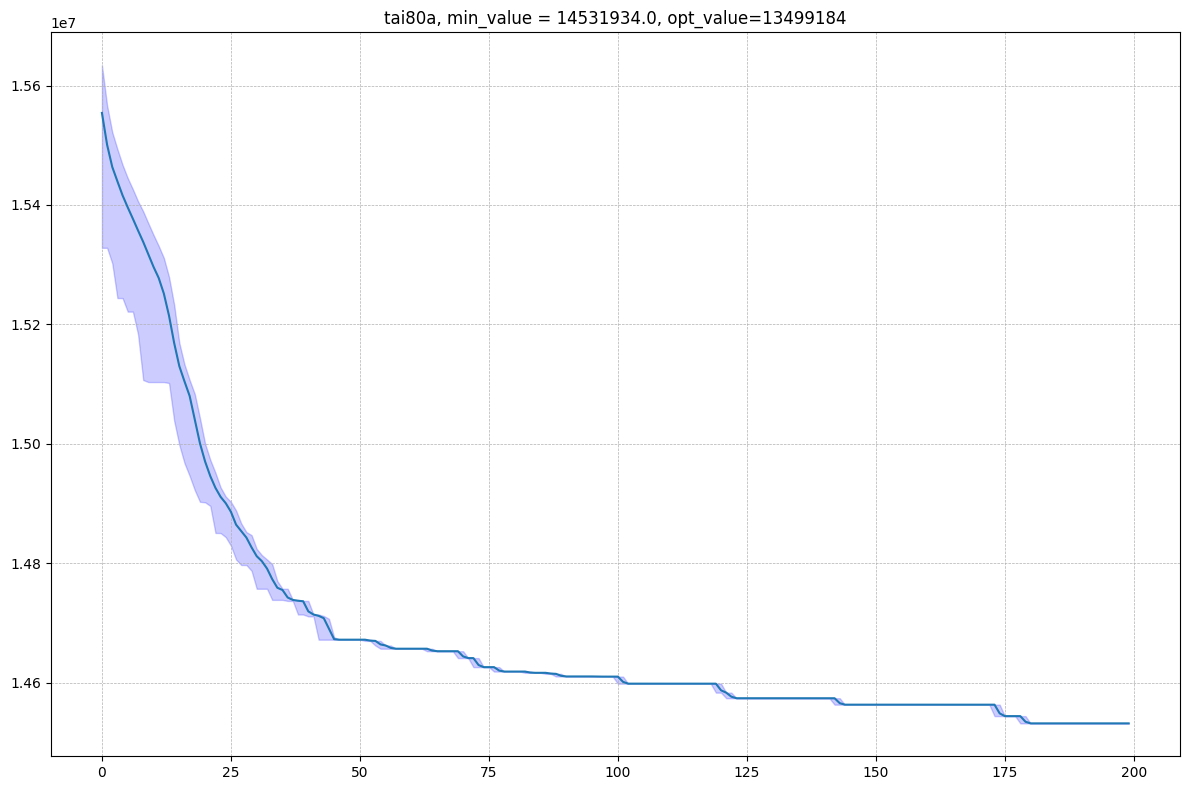

In [120]:
for qap_name, qap_data in QAPs:
    triplets = sda(
        mutation_func=reverse_sequence_mutation,
        n=qap_data[0],
        obj_func=lambda p: qap_objective_function(p, qap_data[1], qap_data[2]),
        number_of_iterations=200
    )
    plot_qap_triplets(triplets, qap_name, opt_value=opts[qap_name])